In [32]:
from dask import dataframe as dd
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from functools import reduce
import seaborn as sns

%matplotlib inline

path = '../data/'

df_sds011 = dd.read_csv(path + 'processed*sds011*').compute()
df_dht22 = dd.read_csv(path + 'processed*dht22*').compute()

df_sds011['timestamp'] = pd.to_datetime(df_sds011['timestamp'], format='%Y-%m-%dT%H:%M:%S')
df_dht22['timestamp'] = pd.to_datetime(df_dht22['timestamp'], format='%Y-%m-%dT%H:%M:%S')


#Problems when remove index category because of multi index
#df_sds011['location'] = df_sds011['location'].astype('category')
#df_dht22['location'] = df_dht22['location'].astype('category')

df_sds011 = df_sds011.set_index(['location', 'timestamp'])
df_dht22 = df_dht22.set_index(['location', 'timestamp'])

df_sds011 = df_sds011.sort_index()
df_dht22 = df_dht22.sort_index()

df_sds011 = df_sds011[['P1', 'P2']]
df_dht22 = df_dht22[['temperature', 'humidity']]

In [11]:
#df_sds011[df_sds011.index >= '2019-02-06 17:00:00']
level_values = df_sds011.index.get_level_values

df_sds011 = df_sds011[level_values(1) >= '2019-02-06 17:00:00'].sort_index()


,P1,P2
Mon,22.216263,15.900629
Tues,20.876335,14.884905
Wed,25.818785,17.405743
Thurs,25.641690,17.841751
Fri,26.210065,17.789476
Sat,27.246787,18.403466
Sun,24.428809,17.155163


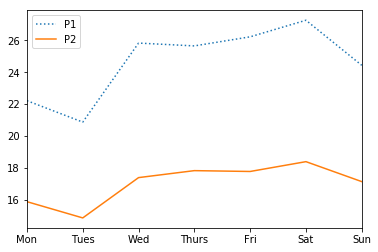

In [15]:
level_values = df_sds011.index.get_level_values
#by_weekday = df_sds011.groupby([level_values(0)] + [level_values(1).dayofweek]).mean()

by_weekday = df_sds011.groupby(level_values(1).dayofweek).mean()
by_weekday.index = ['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun']
by_weekday.plot(style=[':', '-'])
by_weekday

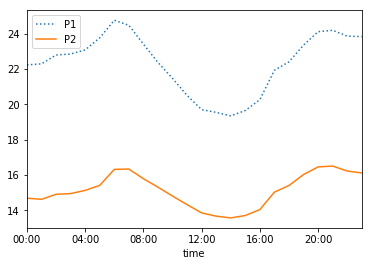

In [16]:
level_values = df_sds011.index.get_level_values
by_time = df_sds011.groupby(level_values(1)).mean()
by_time = by_time.resample('60min').mean()
by_time = by_time.groupby(by_time.index.time).mean()
hourly_ticks = 4 * 60 * 60 * np.arange(6)
by_time.plot(xticks=hourly_ticks, style=[':', '-'])

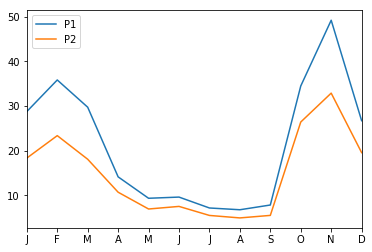

In [27]:
level_values = df_sds011.index.get_level_values
by_month = df_sds011.groupby(level_values(1).month).mean()
by_month.index = ['J', 'F','M','A', 'M','J','J', 'A','S','O', 'N','D']
monthly_ticks =  np.arange(12) 
by_month.plot(xticks=monthly_ticks)

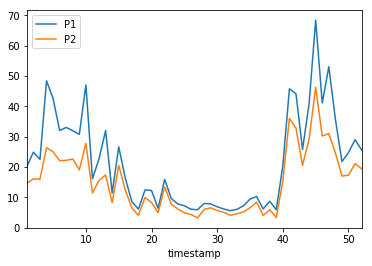

In [53]:

level_values = df_sds011.index.get_level_values
week_nr = df_sds011.groupby(level_values(1).week).mean()
week_nr.plot()


In [66]:
from datetime import datetime

day_of_week = lambda x: x.weekday()
week_number = lambda x: x.strftime('%V')
hour = lambda x: x.time()

t = df_sds011.groupby(pd.Grouper(freq='60min', level=1)).mean().dropna()

t.index.map(hour)[0:5]


Index([22:00:00, 23:00:00, 00:00:00, 01:00:00, 02:00:00], dtype='object', name='timestamp')

In [62]:
t.head()

,P1,P2
timestamp,,
2017-11-19 22:00:00,6.660417,3.399167
2017-11-19 23:00:00,5.965417,2.658750
2017-11-20 00:00:00,7.177917,2.610417
2017-11-20 01:00:00,4.922000,2.161200
2017-11-20 02:00:00,5.546250,2.407500
